<a href="https://colab.research.google.com/github/B-Deforce/numerical_optimization/blob/main/optimization_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sym
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Chapter 3

## Exercise 1

In [ ]:
import helper_functions
import math
import sympy as sym

In [ ]:
math.e

2.718281828459045

-0.0208333333333333*x**3 + 0.25*x + 1/2


<IPython.core.display.Javascript object>


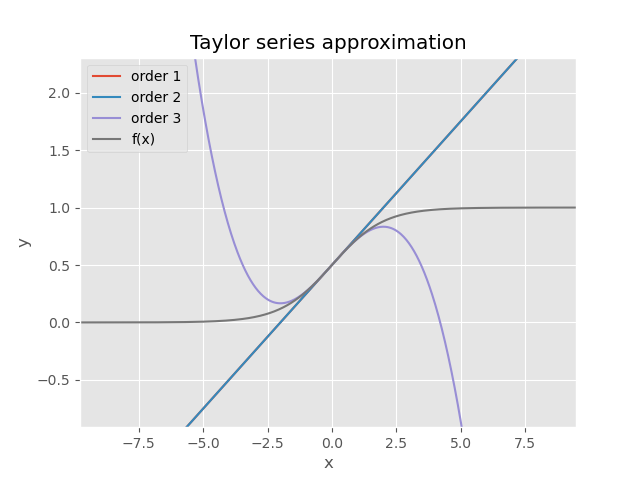

In [ ]:
x = sym.Symbol('x')
exp = math.e**x/(1+math.e**x)

T = helper_functions.BaseFunction('x', exp)

print(T.taylor(0,3))

T.plot_approx(0,3)

## Exercise 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [ ]:
x = np.arange(-5,5,0.01)
y = np.arange(-5,5,0.01)
xx, yy = np.meshgrid(x, y)

In [ ]:
z = math.e**xx * (4*xx**2 + 2*yy**2 + 4*xx*yy + 2*yy + 1)

<IPython.core.display.Javascript object>


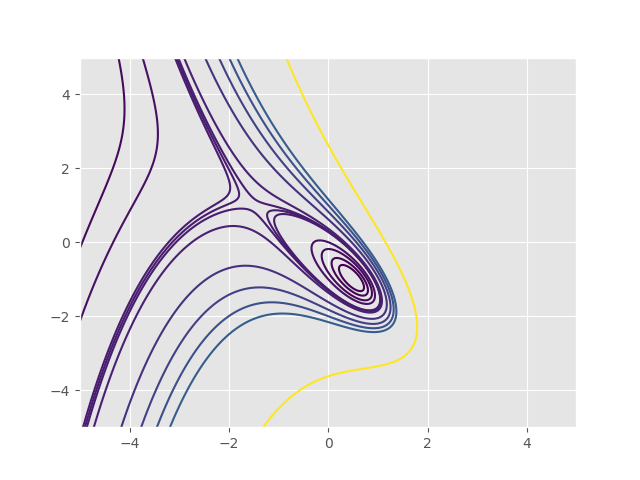

In [ ]:
levels = np.array([0.2, 0.4, 0.7, 1, 1.7, 1.75, 1.8, 2, 3, 4, 5, 6, 20])
plt.contour(xx, yy, z, levels=levels)

<IPython.core.display.Javascript object>


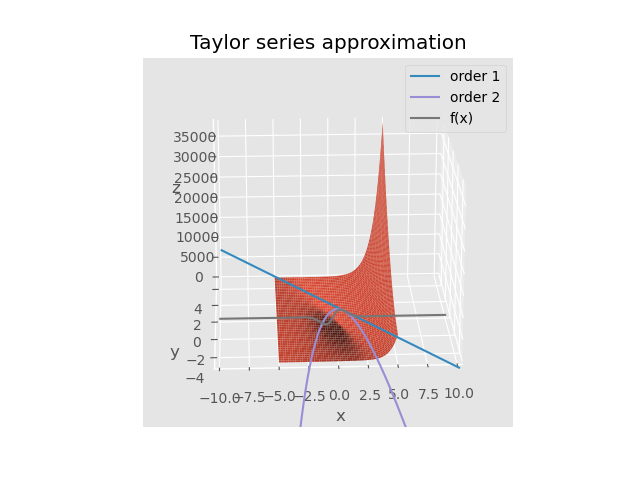

Text(0.5, 0, 'z')

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Exercise 4

In [ ]:
y = sym.Symbol('y')
#phi
p = 1
# rho
r = 2
exp = p*r*y**(r-1)*math.e**(-p*y**r)

T = helper_functions.BaseFunction('y', exp)

print(T.taylor(1,2))

T.plot_approx(1,2)

-0.735758882342885*y - 0.735758882342885*(y - 1)**2 + 1.47151776468577


# Chapter 6
## Exercise 1

Calculating the first steps using the Newton Raphson requires to calculate the Score function and the Hessian. Those are then used in a taylor series expansion.

In [ ]:
x = np.array([[1,1,1,0,0,0]])
y = np.array([[12,15,17,8,11,5]])
N = len(x)
intercept = np.array([[1 for i in range(6)]])
xdesign = np.vstack((intercept, x))

In [ ]:
maxiter = 20

In [ ]:
beta_star = np.array([0,0])
for i in range(maxiter):
    theta = np.dot(beta_star.reshape(-1,1).T,xdesign)

    lamb = np.exp(theta)
    grad = np.dot((y - lamb), xdesign.T)
    hessian = - lamb * np.array([[intercept, x],
                                 [x, x*x]])
    hessian = np.squeeze(hessian).sum(axis=2)
    beta_star = beta_star.reshape(-1,1) - np.dot(np.linalg.inv(hessian), grad.T)
    print(beta_star)

[[7.        ]
 [6.66666667]]
[[6.00729506]
 [6.65938863]]
[[5.02698094]
 [6.63974901]]
[[4.07944959]
 [6.58740612]]
[[3.21478378]
 [6.45241373]]
[[2.53609592]
 [6.13203039]]
[[2.16949514]
 [5.50115356]]
[[2.08337734]
 [4.59411065]]
[[2.07944928]
 [3.61650311]]
[[2.07944154]
 [2.66578404]]
[[2.07944154]
 [1.79328286]]
[[2.07944154]
 [1.09837329]]
[[2.07944154]
 [0.70963047]]
[[2.07944154]
 [0.6113113 ]]
[[2.07944154]
 [0.60614917]]
[[2.07944154]
 [0.6061358 ]]
[[2.07944154]
 [0.6061358 ]]
[[2.07944154]
 [0.6061358 ]]
[[2.07944154]
 [0.6061358 ]]
[[2.07944154]
 [0.6061358 ]]


## Exercise 2

In [ ]:
x1 = np.arange(-100,100,0.1)
x2 = np.arange(-100,100,0.1)
xx1, xx2 = np.meshgrid(x1, x2)

z = 8*xx1 + 12*xx2 + xx1**2 - 2*xx2**2

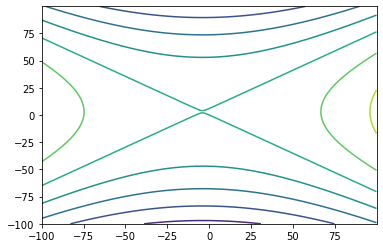

In [ ]:
plt.contour(xx1, xx2, z)
#plt.clabel(cs, inline=1)

## Exercise 3

In [ ]:
x1 = np.arange(-1,2,0.01)
x2 = np.arange(-1,2,0.01)
xx1, xx2 = np.meshgrid(x1, x2)

def z(xx1, xx2):
    z = 100*(xx2 - xx1**2)**2 + (1-xx1**2)
    return z

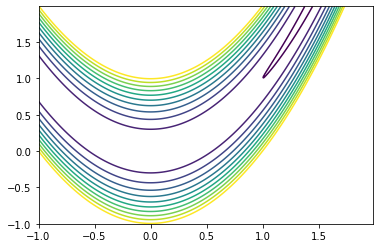

In [ ]:
levels = np.arange(0,101,10)
cs = plt.contour(xx1, xx2, z(xx1, xx2), levels=levels)
#plt.clabel(cs, inline=1)

In [ ]:
maxiter = 5

In [ ]:
def grad(X):
    x1 = X[0][0].item()
    x2 = X[1][0].item()
    grad_x1 = -400*x1*x2 + 400*x1**3 + 2*x1 - 2
    grad_x2 = 200*x2 - 200*x1**2
    return np.array([[grad_x1],
                     [grad_x2]])

In [ ]:
def hess(X):
    x1 = X[0][0].item()
    x2 = X[1][0].item()
    grad_x1x1 = -400*x2 + 1200*x1**2 + 2
    grad_x1x2 = -400*x1
    grad_x2x1 = grad_x1x2
    grad_x2x2 = 200
    return np.array([[grad_x1x1, grad_x1x2],
                     [grad_x2x1, grad_x2x2]])

In [ ]:
# Newton-Raphson
results = {"iteration": [], "point": [], "f": [], "grad": []}
beta_star = np.array([[0],
                      [0]], dtype=float)
for i in range(maxiter):
    gradient = grad(beta_star)
    hessian = hess(beta_star)
    beta_star = beta_star - np.dot(np.linalg.inv(hessian), gradient)
    f = z(beta_star[0][0].item(), beta_star[1][0].item())
    results["iteration"].append(i+1)
    results["point"].append(beta_star)
    results["f"].append(f)
    results["grad"].append(gradient)
pd.DataFrame(results)

,iteration,point,f,grad
0,1,"[[1.0], [0.0]]",1.000000e+02,"[[-2.0], [0.0]]"
1,2,"[[1.0], [1.0000000000000002]]",4.930381e-30,"[[400.0], [-200.0]]"
2,3,"[[1.0], [0.9999999999999999]]",1.232595e-30,"[[-1.1368683772161603e-13], [5.684341886080802..."
3,4,"[[1.0], [1.0]]",0.000000e+00,"[[5.684341886080802e-14], [-2.842170943040401e..."
4,5,"[[1.0], [1.0]]",0.000000e+00,"[[0.0], [0.0]]"


In [ ]:
gradient[1].item()

0.0

In [ ]:
gradient = np.array([[1],
                     [2]])

In [ ]:
sum(gradient**2).item()

5

In [ ]:
maxiter=2

In [ ]:
grad(np.array([[0.02],
               [0]]))

array([[-1.9568],
       [-0.08  ]])

In [ ]:
T_prime

array([[ 0.],
       [-0.]])

In [ ]:
# steepest descent
results = {"iteration": [], "point": [], "f": [], "grad": []}
beta_star = np.array([[0],
                      [0]], dtype=float)
alpha = 0.01
for i in range(maxiter):
    gradient = grad(beta_star)
    hessian = hess(beta_star)
    T_prime_x1 = 2*gradient[0].item()*hessian[0][0].item()*hessian[1][0].item()
    T_prime_x2 = 2*gradient[1].item()*hessian[0][1].item()*hessian[1][1].item()
    T_prime = np.array([[T_prime_x1],
                           [T_prime_x2]])
    #T_prime = gradient / sum(gradient**2).item()
    print(T_prime_x1)
    print(hessian[0][0].item())
    beta_star = beta_star - alpha*T_prime
#    print(beta_star)
    f = z(beta_star[0][0].item(), beta_star[1][0].item())
    results["iteration"].append(i+1)
    results["point"].append(beta_star)
    results["f"].append(f)
    results["grad"].append(gradient)
pd.DataFrame(results)

0.0
2.0
0.0
2.0


,iteration,point,f,grad
0,1,"[[0.0], [0.0]]",1.0,"[[-2.0], [0.0]]"
1,2,"[[0.0], [0.0]]",1.0,"[[-2.0], [0.0]]"


In [ ]:
beta_star

array([[1.],
       [1.]])

In [ ]:
grad(np.array([[0],
               [0]]))**2

array([[4],
       [0]], dtype=int32)

# Chapter 10

## Exercise 1

In [ ]:
a, b = -10, 10
nb_nodes = 20
h = (np.abs(a)+np.abs(b))/nb_nodes
interval = np.arange(a, b+1, h)

In [ ]:
def f(x):
    return math.e**x/(1+math.e**x)**2*1/np.sqrt(2*np.pi)\
    *math.e**(-1/2*x**2)

### Reimannian approximation

In [ ]:
h*np.sum([f(z) for z in interval])

0.20662682389957115

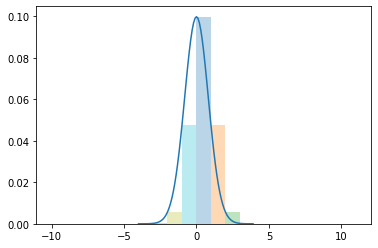

In [ ]:
x = np.arange(-4,4,0.1)
plt.plot(x, f(x))
for i in interval:
    plt.bar(x=i, height=f(i), width=h, alpha=0.3, align="edge")

### Trapezoidal approximation

In [ ]:
t_approx = 0
for i in range(len(interval)-1):
    t_approx =+ h/2*np.sum([f(interval[i]), f(interval[i+1])])

In [ ]:
t_approx

6.341733546271894e-23

In [ ]:
import matplotlib.patches as patches

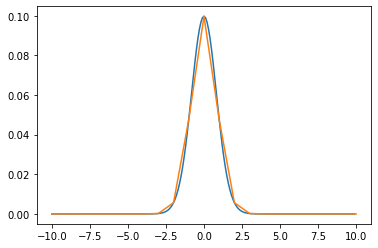

In [ ]:
x = np.arange(-10,10,0.1)
plt.plot(x, f(x))
plt.plot(interval, f(interval))


In [ ]:
import torch

In [ ]:
import pyro

In [ ]:
pyro.distributions.GammaPoisson(4, 3).sample(sample_shape=torch.Size([100]))

tensor([1., 2., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 3., 3.,
        1., 0., 4., 3., 1., 1., 3., 1., 2., 1., 0., 1., 2., 5., 2., 1., 4., 1.,
        1., 1., 1., 0., 1., 0., 0., 3., 5., 0., 0., 2., 0., 0., 0., 1., 3., 1.,
        1., 2., 4., 0., 1., 0., 1., 2., 0., 5., 2., 3., 4., 2., 0., 2., 1., 0.,
        0., 2., 1., 0., 2., 2., 2., 0., 1., 0., 1., 2., 3., 1., 5., 0., 1., 0.,
        1., 1., 0., 1., 1., 0., 2., 2., 4., 2.])